In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [3]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

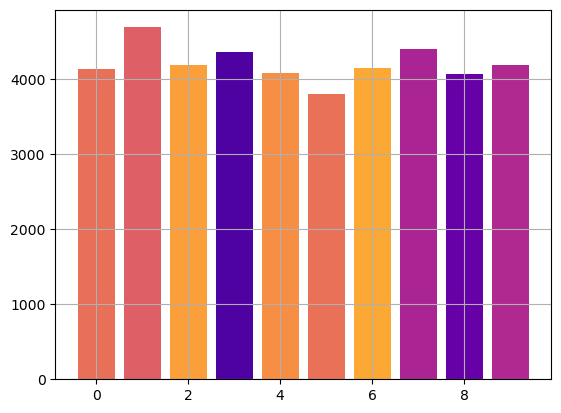

In [7]:
def count_exemple_per_digit(exemples):
    hist = np.ones(10)

    for y in exemples:
        hist[y] += 1

    colors = []
    for i in range(10):
        colors.append(plt.get_cmap('plasma')(np.random.uniform(0.0,1.0,1)[0]))

    bar = plt.bar(np.arange(10), hist, 0.8, color=colors)

    plt.grid()
    plt.show()

count_exemple_per_digit(Y_train)

In [8]:
# Normalize the data
X_train = X_train / 255.0
# renklerin alabileceği maksimum değer 255 dir
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)
Y_train=Y_train.values.reshape(-1,1)
Y_test =Y_test.values.reshape(-1,1)
print("x train shape : ",X_train.shape)
print("x test shape : ",X_test.shape)
print("y train shape : ",Y_train.shape)
print("y test shape : ",Y_test.shape)


x train shape :  (33600, 784)
x test shape :  (8400, 784)
y train shape :  (33600, 1)
y test shape :  (8400, 1)


## Decision Tree (Karar Ağacı)
* Karar ağaçları – sınıflama, özellik ve hedefe göre karar düğümleri (decision nodes) ve yaprak düğümlerinden (leaf nodes) oluşan ağaç yapısı formunda bir model oluşturan bir sınıflandırma yöntemidir.
* Öncelikle bir karar ağacını görelim. Daha sonrasında adım adım bu karar ağacı nasıl oluşturacağımızı anlatalım.
* Aşağıda verilerimizi ve bu verilerden elde edilmiş karara ağacı gösterilmektedir.

<a href="https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/#:~:text=Decision%20Tree%20(Karar%20A%C4%9Fac%C4%B1)%3A%20ID3%20Algoritmas%C4%B1%20%E2%80%93%20Classification%20(S%C4%B1n%C4%B1flama,model%20olu%C5%9Fturan%20bir%20s%C4%B1n%C4%B1fland%C4%B1rma%20y%C3%B6ntemidir..."><img src="https://erdincuzun.com/wp-content/uploads/2017/2016/genel/futbol_veri.png" alt="gec2" border="0"></a>

<a href="https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/#:~:text=Decision%20Tree%20(Karar%20A%C4%9Fac%C4%B1)%3A%20ID3%20Algoritmas%C4%B1%20%E2%80%93%20Classification%20(S%C4%B1n%C4%B1flama,model%20olu%C5%9Fturan%20bir%20s%C4%B1n%C4%B1fland%C4%B1rma%20y%C3%B6ntemidir..."><img src="https://erdincuzun.com/wp-content/uploads/2017/2016/decision_tree/decision_tree.jpg" alt="gec2" border="0"></a>


## Entropy:
* rastgeleliğe, belirsizliği ve beklenmeyen durumun ortaya çıkma olasılığını gösterir.
* Eğer örnekler tamamı düzenli / homojen ise entropisi sıfır olur.
* Eğer değerler birbirine eşit ise entropi 1 olur. Örneğin Futbol Oyna hepsi “Evet” veya “Hayır” olsa entropi sıfır olurdu. Entropi formülasyonu:

<a href="https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/#:~:text=Decision%20Tree%20(Karar%20A%C4%9Fac%C4%B1)%3A%20ID3%20Algoritmas%C4%B1%20%E2%80%93%20Classification%20(S%C4%B1n%C4%B1flama,model%20olu%C5%9Fturan%20bir%20s%C4%B1n%C4%B1fland%C4%B1rma%20y%C3%B6ntemidir..."><img src="https://erdincuzun.com/wp-content/uploads/2017/2016/decision_tree/Entropy_formul.png" alt="gec2" border="0"></a>

<a href="https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/#:~:text=Decision%20Tree%20(Karar%20A%C4%9Fac%C4%B1)%3A%20ID3%20Algoritmas%C4%B1%20%E2%80%93%20Classification%20(S%C4%B1n%C4%B1flama,model%20olu%C5%9Fturan%20bir%20s%C4%B1n%C4%B1fland%C4%B1rma%20y%C3%B6ntemidir..."><img src="https://erdincuzun.com/wp-content/uploads/2017/2016/genel/futbol_sonuc.png" alt="gec2" border="0"></a>



* Entropi sadece hedef üzerine hesaplanmaz.
* Ayrıca özellikler üzerine entropi hesaplanabilir.
* Fakat özellikler üzerine entropi hesaplanırken hedefte göz önüne alır. Bu durumda entropi formülü:

<a href="https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/#:~:text=Decision%20Tree%20(Karar%20A%C4%9Fac%C4%B1)%3A%20ID3%20Algoritmas%C4%B1%20%E2%80%93%20Classification%20(S%C4%B1n%C4%B1flama,model%20olu%C5%9Fturan%20bir%20s%C4%B1n%C4%B1fland%C4%B1rma%20y%C3%B6ntemidir..."><img src="https://erdincuzun.com/wp-content/uploads/2017/2016/decision_tree/Entropy_formul2.jpg" alt="gec2" border="0"></a>

<a href="https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/#:~:text=Decision%20Tree%20(Karar%20A%C4%9Fac%C4%B1)%3A%20ID3%20Algoritmas%C4%B1%20%E2%80%93%20Classification%20(S%C4%B1n%C4%B1flama,model%20olu%C5%9Fturan%20bir%20s%C4%B1n%C4%B1fland%C4%B1rma%20y%C3%B6ntemidir..."><img src="https://erdincuzun.com/wp-content/uploads/2017/2016/decision_tree/dt_veri_frekans_01.jpg" alt="gec2" border="0"></a>

In [10]:
# Desicion Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
# predict
print("Score : ", dt.score(X_test,Y_test))

Score :  0.851547619047619
